# 로지스틱 회귀분석의 개념과 원리




- 어떤 사건이 발생할지에 대한 직접 예측이 아니라 그 사건이 발생할 확률을 예측하는 것이다.

> 로지스틱 회귀분석이 사용되는 예를 보면,

- 금융권에서는 고객의 신용도 평가를 통해 이 고객의 신용도가 우량이 될 것인지, 신용불량자가 될 것인지 미리 예측해 볼 수 있다. 또한 통신사의 경우 2년 약정 종료 후 번호이동으로 타 통신사로 갈 것인지, 기기변경으로 남을 것인지 판단할 수 있다.

- 제과점에서는 전날 저녁에 다음날 팔게 될 빵의 수량을 예측해서 본사에 주문하거나 직접 만들게 되는데 이때 재고를 남기지 않고 모두 판매할 수 있을지 폐기하게 될지 등을 예측하는데 활용해 볼 수 있을 것이다.

- 무엇보다 의학 분야에서는 다양한 원인을 파악하여 질병에 대한 예측을 하는데 더욱 효과적으로 활용해 볼 수 있을 것이다.

- 종속변수 : 이분형(0 또는 1의 값을 가짐)

- 독립변수 : 범주형 OR 연속형

- 종속변수 값, 즉 확률이 0.5보다 크면 그 사건이 일어나며, 0.5보다 작으며 그 사건이 일어나지 않는 것으로 예측 

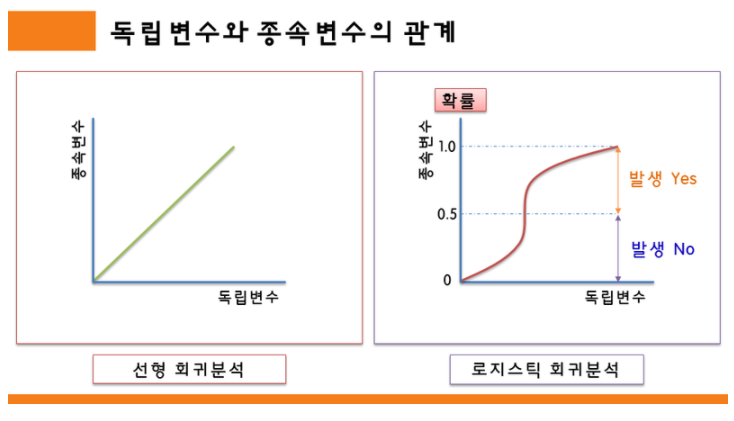

- 참고사이트 : [https://m.blog.naver.com/y4769/221851780608](https://m.blog.naver.com/y4769/221851780608)

- 보건과학통계 SPSS 이야기 / 네이버 블로그 참고함

## 오즈(odds) 이란?

- 일반적 비율(활률) = p/1 = 발생할확률/전체

- 오즈 = p/(1-p) = 발생활확률/발생하지않을확률



|소득구간|명수|소유자|미소유자|소유비율|오즈|
|--------|---|---|---|---|---|
|100만원 미만|100|10|90|10/100|10/90|
|200만원 미만|100|18|82|18/100|18/82|


> 확률이 아닌 오즈비로 계산하는 이유

- 다른집단과의 비교값인 오즈비가 현실세계에서 더욱 타당한 의미를 가짐


## 로짓으로의 변환

- 오즈에 자연로그(log)를 취하여 자료를 반환함

- 로그변환시 자료가 선형적으로 안정화되며 음수와 양수 전체 구간에 무한대로 존재하게 됨

# 실습과 시각화

In [1]:
a <- read.csv('cosmetics.csv',header = T)

In [2]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4


In [3]:
attach(a)

In [4]:
library(car)

Loading required package: carData


In [5]:
a$repurchase_re <- recode(a$repurchase, "lo:3=0; 4:hi=1")

In [6]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase,repurchase_re
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2,0
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4,1
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4,1
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4,1
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3,0
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3,0
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4,1
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4,1
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4,1
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4,1


In [7]:
install.packages("ROCR")

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpM1usDv\downloaded_packages


In [8]:
install.packages("aod")

package 'aod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpM1usDv\downloaded_packages


In [9]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.3"

In [10]:
library(aod)

Warning message:
"package 'aod' was built under R version 3.6.3"

In [12]:
logit.model<-glm(repurchase_re ~ factor(propensity)+ factor(decision)+satisf_al, family = binomial, data=a)

In [13]:
summary(logit.model)


Call:
glm(formula = repurchase_re ~ factor(propensity) + factor(decision) + 
    satisf_al, family = binomial, data = a)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7048  -0.8706   0.3504   0.6925   3.1756  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -7.15812    1.13359  -6.315 2.71e-10 ***
factor(propensity)2  0.04172    0.38248   0.109   0.9131    
factor(propensity)3  1.20851    0.52581   2.298   0.0215 *  
factor(decision)2    0.09932    0.49970   0.199   0.8425    
factor(decision)3    0.38632    0.44657   0.865   0.3870    
satisf_al            2.08071    0.30725   6.772 1.27e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 330.95  on 246  degrees of freedom
Residual deviance: 241.91  on 241  degrees of freedom
AIC: 253.91

Number of Fisher Scoring iterations: 5


> satisf_al(전반만족도)가 높을수록 재구매 할 확률이 높다

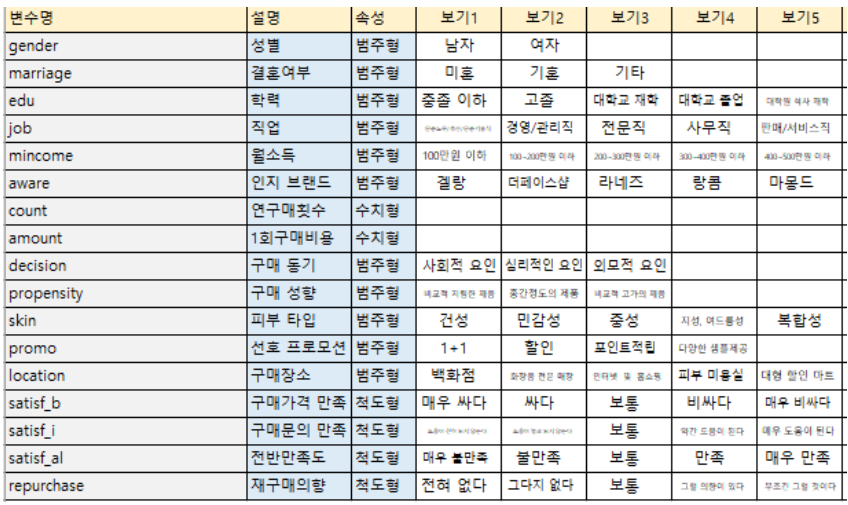

> factor(propensity)3 ,구매성향이 비교적 고가의 제품을 선호하는 구매자들이 재구매 할 확률이 높다. (저가의 제품을 선호하는 구매자들보다)

In [15]:
exp(cbind(OR=coef(logit.model),confint(logit.model))) #신뢰구간 : confint
# OR : 오즈비로 변경해줌

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.0007785181,7.572483e-05,0.006469474
factor(propensity)2,1.0426040653,4.898358e-01,2.207607940
factor(propensity)3,3.3484842168,1.224880e+00,9.775048167
factor(decision)2,1.1044182635,4.125024e-01,2.952278838
factor(decision)3,1.4715484016,6.096242e-01,3.542608278
satisf_al,8.0101445633,4.512294e+00,15.057682143


> 결론 : satisf_al, 전반만족도가 1 정도 증가할때 재구매 확률이 8.0101445633배 증가한다.

> factor(propensity)3 , 저가의 제품을 선호하는 구매자에 비해 고가의 제품을 선호하는 구매자가 3배 더 많이 구매할 의향이 있다,

In [30]:
install.packages('pscl')

package 'pscl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpM1usDv\downloaded_packages


In [31]:
library(pscl)

Warning message:
"package 'pscl' was built under R version 3.6.3"Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


In [34]:
pR2(logit.model) # 로지스틱회귀에서 R -squared 값으로만 모델이 적합한지 판단하기 어려움

fitting null model for pseudo-r2


llh      llhNull           G2     McFadden         r2ML         r2CU 
-120.9563348 -165.4766601   89.0406506    0.2690429    0.3026644    0.4100443

In [35]:
a$pre<-logit.model$fitted.values #예측값 컬럼 만들어줌

In [36]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase,repurchase_re,pre
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2,0,0.05228313
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4,1,0.28577527
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4,1,0.83100316
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4,1,0.83100316
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3,0,0.31540893
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3,0,0.77972003
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4,1,0.38037538
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4,1,0.83100316
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4,1,0.83100316
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4,1,0.94044987


- 0.5 기준(50%)으로 구매할지 안할지 예측한다,

- pre 컬럼값 중 0.5 보다 크면 구매 할 확률이 높고 0.5 보다 낮으면 구매 할 확률이 낫다,

In [38]:
a$preCroup <-recode(a$pre, "lo:0.5=0; 0.5:hi=1")

In [39]:
table(a$preCroup)


  0   1 
105 142 

In [40]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase,repurchase_re,pre,preCroup
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2,0,0.05228313,0
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4,1,0.28577527,0
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4,1,0.83100316,1
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4,1,0.83100316,1
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3,0,0.31540893,0
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3,0,0.77972003,1
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4,1,0.38037538,0
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4,1,0.83100316,1
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4,1,0.83100316,1
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4,1,0.94044987,1


- 두번째 행은 예측하는데 실패함 (1으로 실제 구매했는데 (0.28577527 확률) 0으로 예측함)

In [41]:
model.fit1<-predict(logit.model, type='response')
# response 는 결과 종속변수를 저장하라는 의미임

In [42]:
model.fit2<-ifelse(model.fit1 >0.5,1,0)

In [43]:
model.fit3<-data.frame(model.fit2)

In [44]:
model.fit3

model.fit2
0
0
1
1
0
1
0
1
1
1


In [45]:
library(gmodels) #교차분석하기위해 사용함

Warning message:
"package 'gmodels' was built under R version 3.6.3"

In [47]:
CrossTable(x=a$repurchase_re, y=model.fit3$model.fit2, chisq=T)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  247 

 
                | model.fit3$model.fit2 
a$repurchase_re |         0 |         1 | Row Total | 
----------------|-----------|-----------|-----------|
              0 |        77 |        20 |        97 | 
                |    31.021 |    22.938 |           | 
                |     0.794 |     0.206 |     0.393 | 
                |     0.733 |     0.141 |           | 
                |     0.312 |     0.081 |           | 
----------------|-----------|-----------|-----------|
              1 |        28 |       122 |       150 | 
                |    20.060 |    14.833 |           | 
                |     0.187 |     0.813 |     0.607 | 
                |     0.267 |     0.859 |           | 
                |     0.113 |     0.494 |   

- 실제 값과 예측 값의 교차표이다.

- 구매안했는데 구매할 것으로 예측한 비율이 대략 20%이다.

- 전체 값 247중에 예측으로 맞은 값 77+122 = 199 이다. 199/247 = 0.805668016194332, 대략 80%의 정확도를 보여준다.

In [48]:
library(ROCR)

In [51]:
pr <- prediction(model.fit1, a$repurchase_re)

In [53]:
prf<-performance(pr,measure = 'tpr', x.measure = 'fpr')

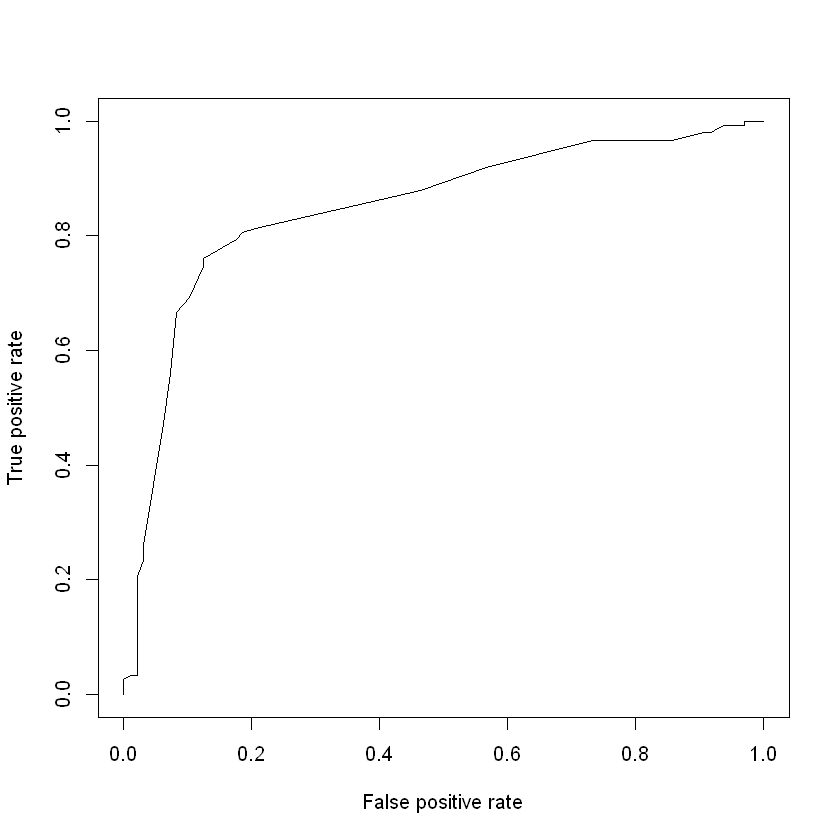

In [54]:
plot(prf) #ROC 커브를 그려줌

- 볼록 뛰어나올수록 예측확률이 높다는 것이다. 위그래프는 볼록 뛰어나왔다.

In [58]:
auc<-performance(pr,measure = 'auc')

In [59]:
auc<-auc@y.values[[1]]

In [61]:
auc # 대략적으로 0.7이상이면 예측 확률이 좋다는 것이다.

[1] 0.8482131